### UNSUPERVISED LEARNING TECHNIQUES


**Preguntas Teóricas**





















1. **¿Cuál es la diferencia fundamental entre el *hard clustering* (agrupamiento duro) y el *soft clustering* (agrupamiento blando)?** Menciona un algoritmo que permita realizar cada uno.

La diferencia fundamental radica en cómo se asignan las instancias a los grupos: 
- Hard CLustering: el algoritmo asigna cada instancia a exactamente un cluster. No hay puntos medios, o pertences al grupo A o al B. El algoritmo K - means se basa en eso.
- Soft Clustering: en lugar de una asignación única, este método otorga a cada instancia una puntuación o probabilidad para cada cluster. Por ejemplo, puede indicar qué tan cerca está una instancia de cada centroide o la probabilidad de que pertenezca a un grupo determinado. El algoritmo de Mezclas Gaussianas permite realizar este tipo de agrupamiento al estimar probabilidades de pertenencia. 

2. **¿Por qué el algoritmo K-Means++ es la opción por defecto en Scikit-Learn frente a la inicialización aleatoria tradicional?** Explica brevemente cómo su lógica de selección de centroides ayuda a mejorar la convergencia.

Es la opción por defecto porque la inicialización aleatoria tradicional a menudo lleva a soluciones subóptimas o mínimos locales dependiendo de la "suerte" inicial. Su lógica de selección consiste en elegir centroides que estén lo más lejos posible entre sí. El proceso funciona así: 
1. Se elige un primer centroide de forma aleatoria. 
2. Para los siguientes, se seleccionan instancias con un probabilidad proporcional al cuadrado de la distancia al centroide más cercano ya existente.
3. Se repite el proceo hasta tener los k centroides necesarios. 

Esta estrategia ayuda a que el algoritmo converja a una solución mucho mejor y reduce la cantidad de veces que es necesario ejecutar el algoritmo.

3. **Explica por qué la inercia no es una métrica fiable para elegir el número óptimo de clústeres (***k***) a medida que este aumenta.** ¿Qué fenómeno ocurre con la inercia cuando *k* es igual al número de instancias?.

La inercia no es una métrica fiable por si sola para elegir k porque siempre disminuye a medida que aumentas el número de clústeres. Cuantos más grupos creas, más cerca estará cada punto de un centroide, lo que reduce la inercia mecánicamente sin que esto signifique necesariamente un mejor agrupamiento. 
En el caso en el que k es igual al número total de instancias, cada punto se convierte en su propio centroide, lo que supone que la distancia de cada instancia a su centroide es 0 y, por tanto, la inercia total sea también 0. 

4. **¿En qué situaciones fallaría el algoritmo K-Means incluso si el usuario selecciona correctamente el número de clústeres?** Menciona al menos tres factores relacionados con la estructura de los datos (forma, densidad, etc.).

El algoritmo K - means tiene limitaciones importantes debido a que asume que los grupos son esféricos y de tamaños similares. Falla principalmente ante estos tres factores: 
- Formas no esféricas: el algoritmo no se comporta bien cuando los clústeres tienen formas alargadas o elipsoidales con diferentes orientaciones. 
- Densidades diferentes: si unos grupos están mucho más densamente compactados que otros, al algoritmo puede tener problemas para identificarlos correctamente. 
- Tamaños muy variados: ya que K - means solo se fija en la distancia al centroide, tienda a dividir clústeres grandes para intentar que todos los grupos tengan un diámetro similar. Esto se ve en la segmentación de imágenes, donde objetos pequeños (con pocos píxeles) pueden ser ignorados o absorbidos por el fondo.


5. **Define qué es una "instancia central" (*core instance*) en el contexto de DBSCAN.** ¿Cómo decide este algoritmo que un punto debe ser clasificado como una anomalía (ruido)?.

DBSCAN defino los grupos basándose en la densidad local de los puntos. Una "instancia central" es aquel punto que tiene al menos una cantidad mínima de vecinos (min_samples) dentro de un radio específico llamado e (epsilon). Son los puntos que forman el corazón de un clúster.
Por otro lado, el algoritmo determinará como anomalía aquellos puntos que no sean instancias centrales (tienen pocos vecinos cerca) y tampoco tienen ninguna instancia central en su vecindario. Se marcan con el índice -1.

6. **¿Qué es el algoritmo de Expectativa-Maximización (EM) y en qué se diferencia de la lógica de asignación de K-Means?**.

Es una técnica más general utilizada principalmente en los modelos GMM. Funciona en dos pasos: **Expectativa**, estima la probabilidad de que cada punto pertenezca a un clúster y **Maximización**, actualiza los parámetros del clúster (centro, forma y tamañao) basándose en esos puntos. 
Las diferencias fundamentales con K - means son: 
- Asignación suave vs. dura: mientras que K - means obliga a cada punto a pertenecer a un único clúster, EM utiliza asignaciones suvaes, dándole a cada punto una probabilidad por cada grupo disponible. 
- Información de clúster: K - means solo busca el centro del grupo. En cambio, EM no solo encuentra los centros, sino también la forma, el tamaño y la orientación de cada elipsoide, además de su peso relativo en el conjunto de datos


7. **Al trabajar con Modelos de Mezcla Gaussiana (GMM), ¿qué papel juegan los criterios BIC (Criterio de Información Bayesiano) y AIC (Criterio de Información de Akaike)?** ¿Se busca maximizar o minimizar estos valores para encontrar el mejor modelo?.

Al trabajar con GMM, no podemos utilizar métricas como la "Inercia" porque no es fiable cuando los clústeres tiene formas no esféricas o tamaños diferentes. En su lugar, utilizamos criterios estadísticos para elegir el número óptimo de clústeres (k).
El BIC (Criterio de Información Bayesiano) y el AIC (Criterio de Información de Akaike) son métricas que miden la calidad de un modelo basándose en su ajuste y su complejidad. Ambos criterios aplican una penalización al modelo por cada parámetro que tiene que aprender (como el número de clústers). La idea es evitar el sobreajuste: un modo con demasiados clústeres podría ajustarse "demasiado"bien al ruido de los daots, perdiendo su capacidad de generalizar. 
Una diferencia clave es que el BIC tiende a seleccionar modelos más simples, especialmente en conjuntos de datos grandes. 
Para encontrar el mejor modelo se busca minimizar tanto el BIC como el AIC. El valor más bajo indica el equilibrio ideal entre un buen ajuste a los datos y una complejidad controlada. 


8. **Describe la diferencia entre la detección de anomalías y la detección de novedades.** ¿Cuál de estas técnicas asumiría que el conjunto de entrenamiento está "limpio" de valores atípicos?.

Aunque ambos conceptos consisten en identificar datos inusuales, se diferencian principalmente por la naturaleza del conjunto de datos utilizado durante el entrenamiento: 
- Detección de anomalías: se entrena en un conjunto de datos que puede estar contaminado con valores atípicos. El algoritmo asume que la gran mauoría de las instancias son normales, aprende a reconocer ese patrón común y detecta las desviaciones fuertes. Es una técnica muy útil para la limpieza de datos. 
- Detección de novedades: se asume que el conjunto de entrenamiento está estrictamente "limpio" de valores atípicos. El objetivo no es encontrar errores en los datos pasados, sino determinar si una instancia nueva es diferente a todo lo visto anteriormente. 

**Ejercicios Prácticos**

In [18]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

9. **Preprocesamiento mediante Clustering:** Carga el dataset `digits` de Scikit-Learn y divídelo en entrenamiento y prueba. Entrena un clasificador de **Regresión Logística** y mide su precisión. Luego, crea un `Pipeline` que primero aplique **K-Means** para reducir la dimensionalidad (reemplazando cada imagen por sus distancias a, por ejemplo, 50 centroides) y después ejecute la Regresión Logística. **¿Mejoró la precisión del modelo?** Utiliza `GridSearchCV` para encontrar el número de clústeres que maximice el rendimiento del clasificador.

In [9]:
# 1. Cargar el dataset
X_digits, y_digits = load_digits(return_X_y=True)

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.2, random_state=42
)

# 3. Entrenar un modelo de regresión logística
log_reg = LogisticRegression(solver="lbfgs", max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)

# 4. Evaluar rendimiento del modelo base
baseline_score = log_reg.score(X_test, y_test)
print(f"Precisión del modelo base: {baseline_score:.4f}")

# 5. Crear un pipeline con KMeans y regresión logística

# Crear clusters -> 2. Escalar distancias -> 3. Clasificar
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42, n_init=10)),
    ("scaler", StandardScaler()), # <-- Esto soluciona el problema de convergencia
    ("log_reg", LogisticRegression(solver="lbfgs", max_iter=1000, random_state=42)),
])

pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)

print(f"Precisión con preprocesamiento K-Means (k=50): {pipeline_score:.4f}")

# 6. Búsqueda de hiperparámetros para KMeans
# Definir el rango de clústeres a probar (ej. de 2 a 100)
param_grid = dict(kmeans__n_clusters=range(2, 100))

# Ejecutar la búsqueda
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

print(f"Mejor número de clústeres: {grid_clf.best_params_}")


# Evaluar el mejor modelo del GridSearch sobre el set de TEST
final_test_score = grid_clf.score(X_test, y_test)
print(f"Precisión final del mejor modelo (k=90) en TEST: {final_test_score:.4f}")

Precisión del modelo base: 0.9750
Precisión con preprocesamiento K-Means (k=50): 0.9722
Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................

En este experimento, el modelo de Regresión Logística base alcanzó una precisión del 97.5%, superando ligeramente a la variante preprocesada con K-Means.

Aunque el GridSearchCV optimizó el sistema utilizando 90 clústeres, la transformación de píxeles a distancias de centroides no logró extraer características más representativas que los datos originales. Esto demuestra que para datasets con baja dimensionalidad (64 características) y alta separabilidad lineal como digits (muy preprocesado y limpio), el preprocesamiento mediante clustering puede introducir ruido o pérdida de información innecesaria.

**Conclusión:** La ingeniería de características mediante clustering es más efectiva en datasets de alta dimensionalidad o donde las fronteras de decisión son altamente no lineales."

10. **Aprendizaje Semi-supervisado con Propagación de Etiquetas:** Utiliza el dataset de dígitos y selecciona solo las primeras **50 instancias etiquetadas** para entrenar un modelo de Regresión Logística. Evalúa su rendimiento en el set de prueba. A continuación, utiliza **K-Means** en el set de entrenamiento completo (incluyendo las imágenes no etiquetadas) para encontrar 50 imágenes representativas (las más cercanas a cada centroide). Etiqueta manualmente solo esas 50 imágenes representativas y propaga sus etiquetas a los demás miembros de su clúster. **¿Cómo se compara la precisión de este nuevo modelo frente al entrenado con 50 instancias aleatorias?**

Precisión con 50 instancias aleatorias: 0.8267
Precisión con propagación total de etiquetas: 0.9111


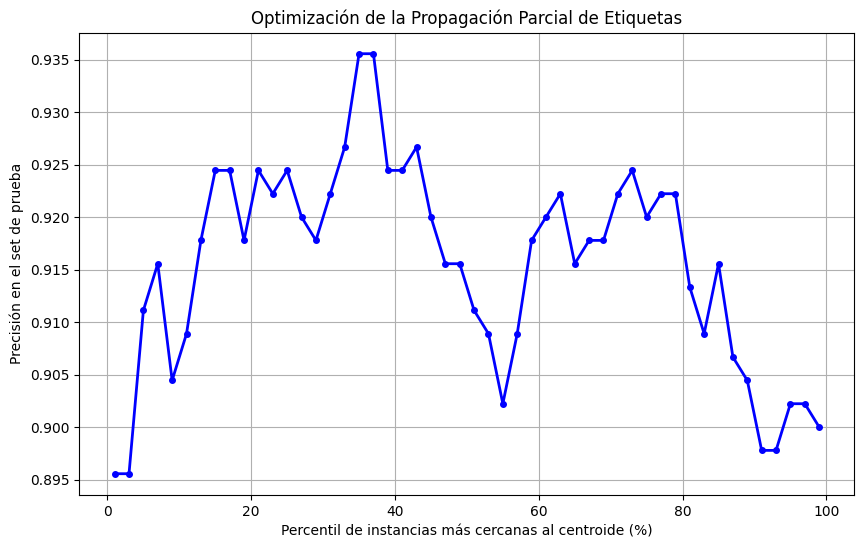

In [20]:
# 1. Cargar y dividir
X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

# 2. Entrenar con solo las primeras 50 instancias etiquetadas
n_labeled = 50
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# 3. Evaluar
baseline_score = log_reg.score(X_test, y_test)
print(f"Precisión con 50 instancias aleatorias: {baseline_score:.4f}")

# Método de propagación

# 1. Agrupamos todo el set de entrenamiento en 50 clústeres
k = 50
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
X_digits_dist = kmeans.fit_transform(X_train)

# 2. Buscamos el índice de la imagen más cercana a cada centroide
representative_digit_indices = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_indices]

#3.  "Etiquetado manual" de las 50 imágenes representativas
y_representative_digits = y_train[representative_digit_indices]

# 4.  Propagación de etiquetas: asignamos a cada instancia la etiqueta de su clúster
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

# 5. Entrenamos un nuevo modelo con las etiquetas propagadas
log_reg_propagated = LogisticRegression(max_iter=10000)
log_reg_propagated.fit(X_train, y_train_propagated)

# 6. Evaluaación del modelo 
propagated_score = log_reg_propagated.score(X_test, y_test)
print(f"Precisión con propagación total de etiquetas: {propagated_score:.4f}")

# MEJORA: Propagación parcial para eliminar el ruido de las fronteras

# Calculamos la distancia de cada instancia a su centroide correspondiente
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

# Lista para almacenar los resultados
percentiles = range(1, 101, 2) # Probamos de 1% a 100% en saltos de 2
scores = []

for percentile in percentiles:
    # 1. Determinar umbrales por clúster para el percentil actual
    keep_indices = []
    for i in range(k):
        in_cluster = (kmeans.labels_ == i)
        cluster_dist = X_cluster_dist[in_cluster]
        
        # Calcular el límite de distancia para este percentil en este clúster
        cutoff_distance = np.percentile(cluster_dist, percentile)
        
        # Identificar índices que cumplen la condición dentro del set de entrenamiento
        in_cluster_indices = np.where(in_cluster)[0]
        is_close = cluster_dist <= cutoff_distance
        keep_indices.extend(in_cluster_indices[is_close])
    
    # 2. Filtrar los datos para el entrenamiento
    X_train_loop = X_train[keep_indices]
    y_train_loop = y_train_propagated[keep_indices]
    
    # 3. Entrenar y evaluar
    log_reg_loop = LogisticRegression(max_iter=10000, random_state=42)
    log_reg_loop.fit(X_train_loop, y_train_loop)
    scores.append(log_reg_loop.score(X_test, y_test))

# 4. Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(percentiles, scores, "b-o", linewidth=2, markersize=4)
plt.xlabel("Percentil de instancias más cercanas al centroide (%)")
plt.ylabel("Precisión en el set de prueba")
plt.title("Optimización de la Propagación Parcial de Etiquetas")
plt.grid(True)
plt.show()

En este gráfico podemos ver que no siempre un mayor porcentaje de propogación se transforma en un aumento de precisión. De este modo, para nuestro experimento deberíamos elegir un valor de propagación (%) de entre 30-35 para lograr un valor máximo de precisión. 